<center><img src="https://i.imgur.com/hkb7Bq7.png" width="500"></center>


### **Prof. José Manuel Magallanes, PhD**

* Professor, Departamento de Ciencias Sociales, Pontificia Universidad Católica del Perú, [jmagallanes@pucp.edu.pe](mailto:jmagallanes@pucp.edu.pe)

* Visiting Professor, Evans School of Public Policy and Governance / Senior Data Science Fellow, eScience Institute, University of Washington, [magajm@uw.edu](mailto:magajm@uw.edu)
_____

_____

<a id='home'></a>


# Using Python for Pre Processing

In the session we will see the use of Python to:

1. Collect data as dataframes into Python
    * [upload table](#upload)
    * [scrape table](#scrape)    

2. Preprocess a data frame:
    * [Fix column names](#fixcolnames)
    * [Subset data](#subset)    
    * [Look for non-standar missing values](#lookfornas)
    * [Missing values](#missingcellvalues)
    * [Format data types](#formatdtypes)


3. Merge both tables:
    * [Basic merge](#merging)
    * [Fuzzy merge](#fuzzmerging)


4. Prepare a file for further analysis
    * [Scaling](#scaling)
    * [Exporting](#exporting)



## 1. Collect data tables into Python

<a id='upload'></a>

### 1.1 Upload a File (Human Development Index)

I have the data in a cloud folder, which I downloaded from this [link](https://hdr.undp.org/data-center/documentation-and-downloads) (_Table 1_).

In [375]:
# Location of data file
linkFile="https://github.com/eScienceWinterSchool/PythonSession/raw/master/data/HDI_Table.xlsx"

Reading in a table from a file using pandas, since it is an Excel file, I requires **openpyxl**:

In [376]:
# available in my computer?
!pip show openpyxl

Name: openpyxl
Version: 3.0.10
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT
Location: /Users/JoseManuel/opt/anaconda3/envs/WinterSchool-3_11/lib/python3.11/site-packages
Requires: et_xmlfile
Required-by: 


If not available, please go to Anaconda and install it. Once installed, or if available, continue:

In [377]:
import pandas as pd

hdiFile=pd.read_excel(linkFile) # only for excel

Take a look (as it is in Excel, it might be a good idea to see it in from Excel too)

In [378]:
hdiFile

,Back,Table 1. Human Development Index and its components,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,SDG3,NaN,SDG4.3,NaN,SDG4.4,NaN,SDG8.5,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Human Development Index (HDI),NaN,Life expectancy at birth,NaN,Expected years of schooling,NaN,Mean years of schooling,NaN,Gross national income (GNI) per capita,NaN,GNI per capita rank minus HDI rank,NaN,HDI rank
4,HDI rank,Country,Value,NaN,(years),NaN,(years),NaN,(years),NaN,(2017 PPP $),NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Column 2: UNDESA (2022a).,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,NaN,"Column 3: CEDLAS and World Bank (2022), ICF Ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,NaN,"Column 4: Barro and Lee (2018), ICF Macro Demo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,NaN,"Column 5: IMF (2022), UNDESA (2022b), United N...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='scrape'></a>

### 1.2 Scrape a Table (The Economist Democracy Index)

Let me bring another table, this time from [wikipedia](https://en.wikipedia.org/wiki/The_Economist_Democracy_Index#Components). Make sure to have **html5lib** and **beautifulsoup4** installed before the next code (use **pip show**)

In [379]:
!pip show html5lib beautifulsoup4

Name: html5lib
Version: 1.1
Summary: HTML parser based on the WHATWG HTML specification
Home-page: https://github.com/html5lib/html5lib-python
Author: 
Author-email: 
License: MIT License
Location: /Users/JoseManuel/opt/anaconda3/envs/WinterSchool-3_11/lib/python3.11/site-packages
Requires: six, webencodings
Required-by: 
---
Name: beautifulsoup4
Version: 4.11.1
Summary: Screen-scraping library
Home-page: https://www.crummy.com/software/BeautifulSoup/bs4/
Author: Leonard Richardson
Author-email: leonardr@segfault.org
License: MIT
Location: /Users/JoseManuel/opt/anaconda3/envs/WinterSchool-3_11/lib/python3.11/site-packages
Requires: soupsieve
Required-by: nbconvert


Now bring the tables:

In [380]:
#path
linkwiki='https://en.wikipedia.org/wiki/The_Economist_Democracy_Index'

In [381]:
# call
sortableTables=pd.read_html(io=linkwiki,# this is the link to main webpage
                            flavor='bs4',# you want pandas to use bs4
                            attrs={"class": "wikitable sortable"}) # an attribute of the table to scrape 

Notice:

- The result **sortableTables** is NOT the data frame you expect. 
- **sortableTables** is a _list_ of all the tables found that match the attributes (_attrs_ above)

Pay attention:

In [382]:
# what you got, and many you got
type(sortableTables), len(sortableTables)

(list, 3)

We have three tables, let's see one of them:

In [383]:
# let's see the second one
sortableTables[1].head(10)

,Region,2022 rank,Country,Regime type,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2008,2006
0,North America,12,Canada,Full democracy,8.88,8.87,9.24,9.22,9.15,9.15,9.15,9.08,9.08,9.08,9.08,9.08,9.08,9.07,9.07
1,North America,30,United States,Flawed democracy,7.85,7.85,7.92,7.96,7.96,7.98,7.98,8.05,8.11,8.11,8.11,8.11,8.18,8.22,8.22
2,Western Europe,20,Austria,Full democracy,8.20,8.07,8.16,8.29,8.29,8.42,8.41,8.54,8.54,8.48,8.62,8.49,8.49,8.49,8.69
3,Western Europe,36,Belgium,Flawed democracy,7.64,7.51,7.51,7.64,7.78,7.78,7.77,7.93,7.93,8.05,8.05,8.05,8.05,8.16,8.15
4,Western Europe,37,Cyprus,Flawed democracy,7.38,7.43,7.56,7.59,7.59,7.59,7.65,7.53,7.40,7.29,7.29,7.29,7.29,7.70,7.60
5,Western Europe,6,Denmark,Full democracy,9.28,9.09,9.15,9.22,9.22,9.22,9.20,9.11,9.11,9.38,9.52,9.52,9.52,9.52,9.52
6,Western Europe,5,Finland,Full democracy,9.29,9.27,9.20,9.25,9.14,9.03,9.03,9.03,9.03,9.03,9.06,9.06,9.19,9.25,9.25
7,Western Europe,22,France,Full democracy,8.07,7.99,7.99,8.12,7.80,7.80,7.92,7.92,8.04,7.92,7.88,7.77,7.77,8.07,8.07
8,Western Europe,14,Germany,Full democracy,8.80,8.67,8.67,8.68,8.68,8.61,8.63,8.64,8.64,8.31,8.34,8.34,8.38,8.82,8.82
9,Western Europe,25,Greece,Flawed democracy,7.97,7.56,7.39,7.43,7.29,7.29,7.23,7.45,7.45,7.65,7.65,7.65,7.92,8.13,8.13


In [384]:
# let's see the third one
sortableTables[2].head(10)

,Rank,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Δ Rank,Country,Regime type,Overall score,Δ Score,Elec­toral pro­cess and plura­lism,Func­tioning of govern­ment,Poli­tical partici­pation,Poli­tical cul­ture,Civil liber­ties
0,1,NaN,Norway,Full democracy,9.81,0.06,10.00,9.64,10.00,10.00,9.41
1,2,NaN,New Zealand,Full democracy,9.61,0.14,10.00,9.29,10.00,8.75,10.00
2,3,2.0,Iceland,Full democracy,9.52,0.34,10.00,9.64,8.89,9.38,9.71
3,4,NaN,Sweden,Full democracy,9.39,0.13,9.58,9.64,8.33,10.00,9.41
4,5,2.0,Finland,Full democracy,9.29,0.02,10.00,9.64,8.33,8.75,9.71
5,6,NaN,Denmark,Full democracy,9.28,0.19,10.00,9.29,8.33,9.38,9.41
6,7,2.0,Switzerland,Full democracy,9.14,0.24,9.58,9.29,8.33,9.38,9.12
7,8,1.0,Ireland,Full democracy,9.13,0.13,10.00,8.21,8.33,10.00,9.12
8,9,2.0,Netherlands,Full democracy,9.00,0.12,9.58,8.93,8.33,8.75,9.41
9,10,2.0,Taiwan,Full democracy,8.99,NaN,10.00,9.64,7.78,8.13,9.41


Let's keep the right one:

In [385]:
# this the one
demoTable=sortableTables[2].copy()

[Home](#home)
______

______

## 2.  Cleaning

<a id='fixcolnames'></a>

### Fix column names

* **Put them in the right place**

Notice that we do not have the right column names. So we need to save them before we go on:

In [386]:
hdiFile.iloc[[3,4],:]

,Back,Table 1. Human Development Index and its components,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
3,NaN,NaN,Human Development Index (HDI),NaN,Life expectancy at birth,NaN,Expected years of schooling,NaN,Mean years of schooling,NaN,Gross national income (GNI) per capita,NaN,GNI per capita rank minus HDI rank,NaN,HDI rank
4,HDI rank,Country,Value,NaN,(years),NaN,(years),NaN,(years),NaN,(2017 PPP $),NaN,NaN,NaN,NaN


As you see, the column names are in different positions:

In [387]:
# here
hdiFile.iloc[3,2:]

Unnamed: 2             Human Development Index (HDI) 
Unnamed: 3                                        NaN
Unnamed: 4                   Life expectancy at birth
Unnamed: 5                                        NaN
Unnamed: 6                Expected years of schooling
Unnamed: 7                                        NaN
Unnamed: 8                    Mean years of schooling
Unnamed: 9                                        NaN
Unnamed: 10    Gross national income (GNI) per capita
Unnamed: 11                                       NaN
Unnamed: 12        GNI per capita rank minus HDI rank
Unnamed: 13                                       NaN
Unnamed: 14                                  HDI rank
Name: 3, dtype: object

In [388]:
# and here
hdiFile.iloc[4,:2]

Back                                                    HDI rank
Table 1. Human Development Index and its components      Country
Name: 4, dtype: object

Can we _concatenate_ those values?

In [389]:
# save column names 
RealHeaders=hdiFile.iloc[4,:2]+hdiFile.iloc[3,2:]
# these are:
RealHeaders

Back                                                    NaN
Table 1. Human Development Index and its components     NaN
Unnamed: 10                                             NaN
Unnamed: 11                                             NaN
Unnamed: 12                                             NaN
Unnamed: 13                                             NaN
Unnamed: 14                                             NaN
Unnamed: 2                                              NaN
Unnamed: 3                                              NaN
Unnamed: 4                                              NaN
Unnamed: 5                                              NaN
Unnamed: 6                                              NaN
Unnamed: 7                                              NaN
Unnamed: 8                                              NaN
Unnamed: 9                                              NaN
dtype: object

It is easier if we have lists, so we use **.to_list()**:

In [390]:
# save column names turned to lists
RealHeaders=hdiFile.iloc[4,:2].to_list()+hdiFile.iloc[3,2:].to_list()
# these are:
RealHeaders

['HDI rank',
 'Country',
 'Human Development Index (HDI) ',
 nan,
 'Life expectancy at birth',
 nan,
 'Expected years of schooling',
 nan,
 'Mean years of schooling',
 nan,
 'Gross national income (GNI) per capita',
 nan,
 'GNI per capita rank minus HDI rank',
 nan,
 'HDI rank']

Let's see how it looks now:

In [391]:
# rename all the columns
hdiFile.columns=RealHeaders

# newDF
better_1=hdiFile.copy()

# see head
better_1.head()

,HDI rank,Country,Human Development Index (HDI),NaN,Life expectancy at birth,NaN,Expected years of schooling,NaN,Mean years of schooling,NaN,Gross national income (GNI) per capita,NaN,GNI per capita rank minus HDI rank,NaN,HDI rank
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,SDG3,NaN,SDG4.3,NaN,SDG4.4,NaN,SDG8.5,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Human Development Index (HDI),NaN,Life expectancy at birth,NaN,Expected years of schooling,NaN,Mean years of schooling,NaN,Gross national income (GNI) per capita,NaN,GNI per capita rank minus HDI rank,NaN,HDI rank
4,HDI rank,Country,Value,NaN,(years),NaN,(years),NaN,(years),NaN,(2017 PPP $),NaN,NaN,NaN,NaN


Notice the repeated column names (HDI rank) and _NaN_. Notice also that we do not need the last three columns. Let's solve that:

In [392]:
# without the last 4 columns
better_1.iloc[:,:-4]

,HDI rank,Country,Human Development Index (HDI),NaN,Life expectancy at birth,NaN,Expected years of schooling,NaN,Mean years of schooling,NaN,Gross national income (GNI) per capita
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,SDG3,NaN,SDG4.3,NaN,SDG4.4,NaN,SDG8.5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Human Development Index (HDI),NaN,Life expectancy at birth,NaN,Expected years of schooling,NaN,Mean years of schooling,NaN,Gross national income (GNI) per capita
4,HDI rank,Country,Value,NaN,(years),NaN,(years),NaN,(years),NaN,(2017 PPP $)
...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Column 2: UNDESA (2022a).,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,NaN,"Column 3: CEDLAS and World Bank (2022), ICF Ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,NaN,"Column 4: Barro and Lee (2018), ICF Macro Demo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,NaN,"Column 5: IMF (2022), UNDESA (2022b), United N...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We use the previous result to rewrite the original:

In [393]:
# then,
better_1=better_1.iloc[:,:-4]

We still have column names with missing values:

In [394]:
better_1.columns

Index([                              'HDI rank',
                                      'Country',
               'Human Development Index (HDI) ',
                                            nan,
                     'Life expectancy at birth',
                                            nan,
                  'Expected years of schooling',
                                            nan,
                      'Mean years of schooling',
                                            nan,
       'Gross national income (GNI) per capita'],
      dtype='object')

...let's get rid of those:

In [395]:
#like this?
better_1.columns.dropna()

Index(['HDI rank', 'Country', 'Human Development Index (HDI) ',
       'Life expectancy at birth', 'Expected years of schooling',
       'Mean years of schooling', 'Gross national income (GNI) per capita'],
      dtype='object')

In [396]:
# make the change!

BetterHeaders=better_1.columns.dropna()
#result
BetterHeaders

Index(['HDI rank', 'Country', 'Human Development Index (HDI) ',
       'Life expectancy at birth', 'Expected years of schooling',
       'Mean years of schooling', 'Gross national income (GNI) per capita'],
      dtype='object')

In [397]:
#subsetting again

better_1=better_1.loc[:,BetterHeaders]
better_2=better_1.copy()
#see
better_2.head(20)

,HDI rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,SDG3,SDG4.3,SDG4.4,SDG8.5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita
4,HDI rank,Country,Value,(years),(years),(years),(2017 PPP $)
5,NaN,NaN,2021,2021,2021,2021,2021
6,NaN,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN
7,1,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454
8,2,Norway,0.961,83.2339,18.1852,13.00363,64660.10622
9,3,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981


Notice above that the columns:
* Have acronyms in parenthesis.
* Have spaces between words.

Let's see what can be done using _Regular Expressions_ (REGEX):

In [398]:
# bye anything between parentheses
better_2.columns.str.replace('\(.+\)',"", regex=True)

Index(['HDI rank', 'Country', 'Human Development Index  ',
       'Life expectancy at birth', 'Expected years of schooling',
       'Mean years of schooling', 'Gross national income  per capita'],
      dtype='object')

In [399]:
# bye anything between parentheses, bye leading-trailing spaces
better_2.columns.str.replace('\(.+\)',"", regex=True).str.strip()

Index(['HDI rank', 'Country', 'Human Development Index',
       'Life expectancy at birth', 'Expected years of schooling',
       'Mean years of schooling', 'Gross national income  per capita'],
      dtype='object')

In [400]:
# bye anything between parentheses, bye leading-trailing spaces, title case
better_2.columns.str.replace('\(.+\)',"", regex=True).\
                          str.strip().\
                          str.title()

Index(['Hdi Rank', 'Country', 'Human Development Index',
       'Life Expectancy At Birth', 'Expected Years Of Schooling',
       'Mean Years Of Schooling', 'Gross National Income  Per Capita'],
      dtype='object')

Let's keep this last one for a while:

In [401]:
#changing column names
better_2.columns=better_2.columns.str.replace('\(.+\)',"", regex=True).\
                          str.strip().\
                          str.title()
#so
better_2

,Hdi Rank,Country,Human Development Index,Life Expectancy At Birth,Expected Years Of Schooling,Mean Years Of Schooling,Gross National Income Per Capita
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,SDG3,SDG4.3,SDG4.4,SDG8.5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita
4,HDI rank,Country,Value,(years),(years),(years),(2017 PPP $)
...,...,...,...,...,...,...,...
271,NaN,Column 2: UNDESA (2022a).,NaN,NaN,NaN,NaN,NaN
272,NaN,"Column 3: CEDLAS and World Bank (2022), ICF Ma...",NaN,NaN,NaN,NaN,NaN
273,NaN,"Column 4: Barro and Lee (2018), ICF Macro Demo...",NaN,NaN,NaN,NaN,NaN
274,NaN,"Column 5: IMF (2022), UNDESA (2022b), United N...",NaN,NaN,NaN,NaN,NaN


Now, it is time to decide how the we want as the shorter column name:

* Same title without spaces:

In [402]:
better_2.columns.str.replace(" ",'',regex=False)

Index(['HdiRank', 'Country', 'HumanDevelopmentIndex', 'LifeExpectancyAtBirth',
       'ExpectedYearsOfSchooling', 'MeanYearsOfSchooling',
       'GrossNationalIncomePerCapita'],
      dtype='object')

* Some acronyms: Let's do this step by step.

In [403]:
# each column names splitted:
[name.split() for name in better_2.columns[2::]]

[['Human', 'Development', 'Index'],
 ['Life', 'Expectancy', 'At', 'Birth'],
 ['Expected', 'Years', 'Of', 'Schooling'],
 ['Mean', 'Years', 'Of', 'Schooling'],
 ['Gross', 'National', 'Income', 'Per', 'Capita']]

In [404]:
# first letter of each word
[[word[0] for word in name.split()] for name in better_2.columns[2::]]

[['H', 'D', 'I'],
 ['L', 'E', 'A', 'B'],
 ['E', 'Y', 'O', 'S'],
 ['M', 'Y', 'O', 'S'],
 ['G', 'N', 'I', 'P', 'C']]

In [405]:
# final result
[''.join([word[0] for word in name.split()]) for name in better_2.columns[2::]]

['HDI', 'LEAB', 'EYOS', 'MYOS', 'GNIPC']

Let's keep the last alternative:

In [406]:
newNames=[''.join([word[0] for word in name.split()]) for name in better_2.columns[2::]]
better_2.columns=better_2.columns[:2].str.replace(" ",'',regex=False).to_list()+newNames

#newDF
better_3=better_2.copy()

Finally...

In [407]:
better_3.head(20)

,HdiRank,Country,HDI,LEAB,EYOS,MYOS,GNIPC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,SDG3,SDG4.3,SDG4.4,SDG8.5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita
4,HDI rank,Country,Value,(years),(years),(years),(2017 PPP $)
5,NaN,NaN,2021,2021,2021,2021,2021
6,NaN,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN
7,1,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454
8,2,Norway,0.961,83.2339,18.1852,13.00363,64660.10622
9,3,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981


[Home](#home)
______

<a id='subset'></a>

### Subset data

After becoming familar with the data, we know we should keep countries with ranking value:

In [408]:
better_3[~pd.isna(better_3['HdiRank'])]

,HdiRank,Country,HDI,LEAB,EYOS,MYOS,GNIPC
4,HDI rank,Country,Value,(years),(years),(years),(2017 PPP $)
7,1,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454
8,2,Norway,0.961,83.2339,18.1852,13.00363,64660.10622
9,3,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981
10,4,"Hong Kong, China (SAR)",0.952,85.4734,17.27817,12.22621,62606.8454
...,...,...,...,...,...,...,...
196,187,Burundi,0.426,61.6627,10.722722,3.129267,731.786709
197,188,Central African Republic,0.404,53.8947,8.040172,4.334,966.058611
198,189,Niger,0.4,61.5763,6.957112,2.116717,1239.866936
199,190,Chad,0.394,52.5254,8.035914,2.573774,1364.169417


In [409]:
# then
hdiSubset=better_3[~pd.isna(better_3['HdiRank'])].copy()

#see
hdiSubset

,HdiRank,Country,HDI,LEAB,EYOS,MYOS,GNIPC
4,HDI rank,Country,Value,(years),(years),(years),(2017 PPP $)
7,1,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454
8,2,Norway,0.961,83.2339,18.1852,13.00363,64660.10622
9,3,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981
10,4,"Hong Kong, China (SAR)",0.952,85.4734,17.27817,12.22621,62606.8454
...,...,...,...,...,...,...,...
196,187,Burundi,0.426,61.6627,10.722722,3.129267,731.786709
197,188,Central African Republic,0.404,53.8947,8.040172,4.334,966.058611
198,189,Niger,0.4,61.5763,6.957112,2.116717,1239.866936
199,190,Chad,0.394,52.5254,8.035914,2.573774,1364.169417


We still have a bad row data:

In [410]:
hdiSubset.drop(index=4)

,HdiRank,Country,HDI,LEAB,EYOS,MYOS,GNIPC
7,1,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454
8,2,Norway,0.961,83.2339,18.1852,13.00363,64660.10622
9,3,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981
10,4,"Hong Kong, China (SAR)",0.952,85.4734,17.27817,12.22621,62606.8454
11,5,Australia,0.951,84.5265,21.05459,12.72682,49238.43335
...,...,...,...,...,...,...,...
196,187,Burundi,0.426,61.6627,10.722722,3.129267,731.786709
197,188,Central African Republic,0.404,53.8947,8.040172,4.334,966.058611
198,189,Niger,0.4,61.5763,6.957112,2.116717,1239.866936
199,190,Chad,0.394,52.5254,8.035914,2.573774,1364.169417


We just drop it:

In [411]:
hdiSubset.drop(index=4, inplace=True)
hdiSubset.reset_index(drop=True, inplace=True)
#see
hdiSubset

,HdiRank,Country,HDI,LEAB,EYOS,MYOS,GNIPC
0,1,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454
1,2,Norway,0.961,83.2339,18.1852,13.00363,64660.10622
2,3,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981
3,4,"Hong Kong, China (SAR)",0.952,85.4734,17.27817,12.22621,62606.8454
4,5,Australia,0.951,84.5265,21.05459,12.72682,49238.43335
...,...,...,...,...,...,...,...
186,187,Burundi,0.426,61.6627,10.722722,3.129267,731.786709
187,188,Central African Republic,0.404,53.8947,8.040172,4.334,966.058611
188,189,Niger,0.4,61.5763,6.957112,2.116717,1239.866936
189,190,Chad,0.394,52.5254,8.035914,2.573774,1364.169417


[Home](#home)
______

<a id='lookfornas'></a>

### Look for non-standar missing values

First check a cell that is full of non-word/non-digit characters:

Using **try**:

In [412]:
for i in range(hdiSubset.shape[1]):
    try:
        print(hdiSubset.iloc[:,i][hdiSubset.iloc[:,i].str.fullmatch("\W+",na=False)])
    except:
        pass

Series([], Name: Country, dtype: object)


We do not have weird symbols, but if we had:

In [413]:
# replacing !

badSymbols=["..",'xx','tba']
hdiSubset.replace(to_replace=badSymbols,
               value=None,
               inplace=True)

#result
hdiSubset

,HdiRank,Country,HDI,LEAB,EYOS,MYOS,GNIPC
0,1,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454
1,2,Norway,0.961,83.2339,18.1852,13.00363,64660.10622
2,3,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981
3,4,"Hong Kong, China (SAR)",0.952,85.4734,17.27817,12.22621,62606.8454
4,5,Australia,0.951,84.5265,21.05459,12.72682,49238.43335
...,...,...,...,...,...,...,...
186,187,Burundi,0.426,61.6627,10.722722,3.129267,731.786709
187,188,Central African Republic,0.404,53.8947,8.040172,4.334,966.058611
188,189,Niger,0.4,61.5763,6.957112,2.116717,1239.866936
189,190,Chad,0.394,52.5254,8.035914,2.573774,1364.169417


[Home](#home)
______

<a id='missingcellvalues'></a>

### Missing values

Do the current cell values have issues?

* Keeping complete data

In [414]:
# with all missing (after the first column)
hdiSubset[hdiSubset.iloc[:,1:].isna().all(axis=1)]

,HdiRank,Country,HDI,LEAB,EYOS,MYOS,GNIPC


In [415]:
# with at least one missing (after the first column)
hdiSubset[hdiSubset.iloc[:,1:].isna().any(axis=1)]

,HdiRank,Country,HDI,LEAB,EYOS,MYOS,GNIPC


In [416]:
hdiClean=hdiSubset.copy()

[Home](#home)
______

<a id='formatdtypes'></a>

## Formatting DFs

Let's check the data types:

In [417]:
# explore
hdiClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   HdiRank  191 non-null    object
 1   Country  191 non-null    object
 2   HDI      191 non-null    object
 3   LEAB     191 non-null    object
 4   EYOS     191 non-null    object
 5   MYOS     191 non-null    object
 6   GNIPC    191 non-null    object
dtypes: object(7)
memory usage: 10.6+ KB


This way you drop a column name (not the whole column):

In [418]:
hdiClean.columns.drop('Country')

Index(['HdiRank', 'HDI', 'LEAB', 'EYOS', 'MYOS', 'GNIPC'], dtype='object')

Numbers have been recognised as **object** type. It might be due to having a non numeric value in one cell, or because it **had** a non-numeric value before.

In [419]:
# keep all numeric columns

allNumCols=hdiClean.columns.drop('Country')
allNumCols

Index(['HdiRank', 'HDI', 'LEAB', 'EYOS', 'MYOS', 'GNIPC'], dtype='object')

In [420]:
# as easy as:
hdiClean[allNumCols]=hdiClean[allNumCols].apply(pd.to_numeric)
hdiFormat=hdiClean.copy()

In [421]:
#recheck
hdiFormat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   HdiRank  191 non-null    int64  
 1   Country  191 non-null    object 
 2   HDI      191 non-null    float64
 3   LEAB     191 non-null    float64
 4   EYOS     191 non-null    float64
 5   MYOS     191 non-null    float64
 6   GNIPC    191 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.6+ KB


That was easy!

In [422]:
# can you apply math?
hdiFormat.drop(columns=['Country'], axis=0).max()

HdiRank       191.000000
HDI             0.962000
LEAB           85.473400
EYOS           21.054590
MYOS           14.090967
GNIPC      146829.700600
dtype: float64

Before the next process, let's quickly preprocess the table we scraped:

In [423]:
# brief look
demoTable

,Rank,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Δ Rank,Country,Regime type,Overall score,Δ Score,Elec­toral pro­cess and plura­lism,Func­tioning of govern­ment,Poli­tical partici­pation,Poli­tical cul­ture,Civil liber­ties
0,1,NaN,Norway,Full democracy,9.81,0.06,10.00,9.64,10.00,10.00,9.41
1,2,NaN,New Zealand,Full democracy,9.61,0.14,10.00,9.29,10.00,8.75,10.00
2,3,2.0,Iceland,Full democracy,9.52,0.34,10.00,9.64,8.89,9.38,9.71
3,4,NaN,Sweden,Full democracy,9.39,0.13,9.58,9.64,8.33,10.00,9.41
4,5,2.0,Finland,Full democracy,9.29,0.02,10.00,9.64,8.33,8.75,9.71
...,...,...,...,...,...,...,...,...,...,...,...
162,163,1.0,Syria,Authoritarian,1.43,NaN,0.00,0.00,2.78,4.38,0.00
163,164,2.0,Central African Republic,Authoritarian,1.35,0.08,0.83,0.00,1.67,1.88,2.35
164,165,NaN,North Korea,Authoritarian,1.08,NaN,0.00,2.50,1.67,1.25,0.00
165,166,NaN,Myanmar,Authoritarian,0.74,0.28,0.00,0.00,0.56,3.13,0.00


In [424]:
#data types
demoTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Rank                                                                           167 non-null    int64  
 1   .mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Δ Rank  127 non-null    float64
 2   Country                                                                        167 non-null    object 
 3   Regime type                                                                    167 non-null    object 
 4   Overall score                                                                  167 non-null    float64
 5   Δ Score                                                                        118 non-null    float64
 6   Elec­toral pro­cess and pl

In [425]:
# keep some:
someCols=demoTable.columns[~demoTable.columns.str.contains('Δ')]


#subset
demoTable=demoTable[someCols].copy()

demoTable.columns=demoSub.columns.str.replace('\W',"",regex=True)

#then
demoTable

,Rank,Country,Regimetype,Overallscore,Electoralprocessandpluralism,Functioningofgovernment,Politicalparticipation,Politicalculture,Civilliberties
0,1,Norway,Full democracy,9.81,10.00,9.64,10.00,10.00,9.41
1,2,New Zealand,Full democracy,9.61,10.00,9.29,10.00,8.75,10.00
2,3,Iceland,Full democracy,9.52,10.00,9.64,8.89,9.38,9.71
3,4,Sweden,Full democracy,9.39,9.58,9.64,8.33,10.00,9.41
4,5,Finland,Full democracy,9.29,10.00,9.64,8.33,8.75,9.71
...,...,...,...,...,...,...,...,...,...
162,163,Syria,Authoritarian,1.43,0.00,0.00,2.78,4.38,0.00
163,164,Central African Republic,Authoritarian,1.35,0.83,0.00,1.67,1.88,2.35
164,165,North Korea,Authoritarian,1.08,0.00,2.50,1.67,1.25,0.00
165,166,Myanmar,Authoritarian,0.74,0.00,0.00,0.56,3.13,0.00


We a categorical column:

In [426]:
#rewrite the levels in ascending order:
correctLevels=['Authoritarian', 'Hybrid regime', 'Flawed democracy','Full democracy']
#format as ordinal:
demoTable.Regimetype=pd.Categorical(demoTable.Regimetype,categories=correctLevels,ordered=True)
demoFormat=demoTable.copy()

In [427]:
demoFormat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Rank                          167 non-null    int64   
 1   Country                       167 non-null    object  
 2   Regimetype                    167 non-null    category
 3   Overallscore                  167 non-null    float64 
 4   Electoralprocessandpluralism  167 non-null    float64 
 5   Functioningofgovernment       167 non-null    float64 
 6   Politicalparticipation        167 non-null    float64 
 7   Politicalculture              167 non-null    float64 
 8   Civilliberties                167 non-null    float64 
dtypes: category(1), float64(6), int64(1), object(1)
memory usage: 10.9+ KB


[Home](#home)
______


## 3. Integrating



<a id='merging'></a>

### Basic merging



If we are confident we did a good cleaning and formatting, this step should be easy:

In [428]:
# left_on= / right_on NOT NEEDED (only when column names differ)
HdiDemo=hdiFormat.merge(demoFormat,left_on='Country', right_on='Country')
HdiDemo

,HdiRank,Country,HDI,LEAB,EYOS,MYOS,GNIPC,Rank,Regimetype,Overallscore,Electoralprocessandpluralism,Functioningofgovernment,Politicalparticipation,Politicalculture,Civilliberties
0,1,Switzerland,0.962,83.9872,16.500299,13.859660,66933.004540,7,Full democracy,9.14,9.58,9.29,8.33,9.38,9.12
1,2,Norway,0.961,83.2339,18.185200,13.003630,64660.106220,1,Full democracy,9.81,10.00,9.64,10.00,10.00,9.41
2,3,Iceland,0.959,82.6782,19.163059,13.767170,55782.049810,3,Full democracy,9.52,10.00,9.64,8.89,9.38,9.71
3,5,Australia,0.951,84.5265,21.054590,12.726820,49238.433350,15,Full democracy,8.71,10.00,8.57,7.78,7.50,9.71
4,6,Denmark,0.948,81.3753,18.714800,12.960490,60364.785950,6,Full democracy,9.28,10.00,9.29,8.33,9.38,9.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,186,Mali,0.428,58.9414,7.423038,2.310000,2132.629443,119,Authoritarian,3.23,1.17,0.00,5.56,5.63,3.82
141,187,Burundi,0.426,61.6627,10.722722,3.129267,731.786709,148,Authoritarian,2.13,0.00,0.00,3.89,5.00,1.76
142,188,Central African Republic,0.404,53.8947,8.040172,4.334000,966.058611,164,Authoritarian,1.35,0.83,0.00,1.67,1.88,2.35
143,189,Niger,0.400,61.5763,6.957112,2.116717,1239.866936,112,Authoritarian,3.73,2.92,1.50,3.89,5.63,4.71


Notice the amount of rowd **returned above**, and compare it with the amount of rows in each data frame:

In [429]:
len(HdiDemo),len(hdiFormat),len(demoFormat)

(145, 191, 167)

If you do not want to check country names, you stop here.

[Home](#home)
______

<a id='fuzzmerging'></a>

### Fuzzy Merge


The smallest amount of rows between two tables, is the maximum amount you expect after the merge. Let's check the key values that were not matched:

In [430]:
onlyHDI=set(hdiFormat.Country)-set(demoFormat.Country)
onlyDEMO=set(demoFormat.Country)-set(hdiFormat.Country)

In [431]:
onlyHDI

{'Andorra',
 'Antigua and Barbuda',
 'Bahamas',
 'Barbados',
 'Belize',
 'Bolivia (Plurinational State of)',
 'Brunei Darussalam',
 'Cabo Verde',
 'Congo',
 'Congo (Democratic Republic of the)',
 'Czechia',
 "Côte d'Ivoire",
 'Dominica',
 'Eswatini (Kingdom of)',
 'Grenada',
 'Hong Kong, China (SAR)',
 'Iran (Islamic Republic of)',
 'Kiribati',
 'Korea (Republic of)',
 "Lao People's Democratic Republic",
 'Liechtenstein',
 'Maldives',
 'Marshall Islands',
 'Micronesia (Federated States of)',
 'Moldova (Republic of)',
 'Palau',
 'Palestine, State of',
 'Russian Federation',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'San Marino',
 'Sao Tome and Principe',
 'Seychelles',
 'Solomon Islands',
 'South Sudan',
 'Syrian Arab Republic',
 'Tanzania (United Republic of)',
 'Timor-Leste',
 'Tonga',
 'Tuvalu',
 'Türkiye',
 'Vanuatu',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam'}

In [432]:
onlyDEMO

{'Bolivia',
 'Cape Verde',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'East Timor',
 'Eswatini',
 'Hong Kong',
 'Iran',
 'Ivory Coast',
 'Laos',
 'Moldova',
 'North Korea',
 'Palestine',
 'Republic of the Congo',
 'Russia',
 'South Korea',
 'Syria',
 'Taiwan',
 'Tanzania',
 'Turkey',
 'Venezuela',
 'Vietnam'}

The previous objects (onlyDEMO, onlyHDI) inform the values not matched in the other data frames. 
If you want to recover some of these values, you may follow these steps (you may need to install **thefuzz**):

In [433]:
from thefuzz import process as fz

# take a country from onlyDEMO

# and get the country that matches the most in OnlyHDI, show the match score!

# notice I sorted onlyDEMO

[(aDemoCountry,fz.extractOne(aDemoCountry, onlyHDI)) for aDemoCountry in sorted(onlyDEMO)]

[('Bolivia', ('Bolivia (Plurinational State of)', 90)),
 ('Cape Verde', ('Cabo Verde', 80)),
 ('Czech Republic', ('Iran (Islamic Republic of)', 86)),
 ('Democratic Republic of the Congo',
  ('Congo (Democratic Republic of the)', 95)),
 ('East Timor', ('Timor-Leste', 82)),
 ('Eswatini', ('Eswatini (Kingdom of)', 90)),
 ('Hong Kong', ('Hong Kong, China (SAR)', 90)),
 ('Iran', ('Iran (Islamic Republic of)', 90)),
 ('Ivory Coast', ("Côte d'Ivoire", 58)),
 ('Laos', ('Barbados', 68)),
 ('Moldova', ('Moldova (Republic of)', 90)),
 ('North Korea', ('Korea (Republic of)', 86)),
 ('Palestine', ('Palestine, State of', 90)),
 ('Republic of the Congo', ('Congo', 90)),
 ('Russia', ('Russian Federation', 90)),
 ('South Korea', ('Korea (Republic of)', 86)),
 ('Syria', ('Syrian Arab Republic', 90)),
 ('Taiwan', ('Venezuela (Bolivarian Republic of)', 60)),
 ('Tanzania', ('Tanzania (United Republic of)', 90)),
 ('Turkey', ('Türkiye', 67)),
 ('Venezuela', ('Venezuela (Bolivarian Republic of)', 90)),
 ('Vi

There are countries that will not find a match, then let's subset:

In [434]:
notInHDI=['North Korea','Taiwan']
demoFormat_sub=demoFormat[~demoFormat.Country.isin(notInHDI)]

There are countries that did find a match, but the process worked wrong. Let's change it by brute force:

In [435]:
# dictionary of changes
changesDEMO={'Czech Republic':'Czechia',
             'Laos':"Lao People's Democratic Republic"}

# make the replacement
demoFormat_sub.Country.replace(to_replace=changesDEMO,inplace=True)

As we have make changes to the column values, let's redo the fuzzy-merging process:

In [437]:
onlyHDI=set(hdiFormat.Country)-set(demoFormat_sub.Country)
onlyDEMO=set(demoFormat_sub.Country)-set(hdiFormat.Country)

[(aDemoCountry,fz.extractOne(aDemoCountry, onlyHDI)) for aDemoCountry in sorted(onlyDEMO)]

[('Bolivia', ('Bolivia (Plurinational State of)', 90)),
 ('Cape Verde', ('Cabo Verde', 80)),
 ('Democratic Republic of the Congo',
  ('Congo (Democratic Republic of the)', 95)),
 ('East Timor', ('Timor-Leste', 82)),
 ('Eswatini', ('Eswatini (Kingdom of)', 90)),
 ('Hong Kong', ('Hong Kong, China (SAR)', 90)),
 ('Iran', ('Iran (Islamic Republic of)', 90)),
 ('Ivory Coast', ("Côte d'Ivoire", 58)),
 ('Moldova', ('Moldova (Republic of)', 90)),
 ('Palestine', ('Palestine, State of', 90)),
 ('Republic of the Congo', ('Congo', 90)),
 ('Russia', ('Russian Federation', 90)),
 ('South Korea', ('Korea (Republic of)', 86)),
 ('Syria', ('Syrian Arab Republic', 90)),
 ('Tanzania', ('Tanzania (United Republic of)', 90)),
 ('Turkey', ('Türkiye', 67)),
 ('Venezuela', ('Venezuela (Bolivarian Republic of)', 90)),
 ('Vietnam', ('Viet Nam', 93))]

All matches are great. Let's create a **dictionary of changes**:

In [438]:
changesDEMO={aDemoCountry:fz.extractOne(aDemoCountry, onlyHDI)[0] for aDemoCountry in sorted(onlyDEMO)}
changesDEMO

{'Bolivia': 'Bolivia (Plurinational State of)',
 'Cape Verde': 'Cabo Verde',
 'Democratic Republic of the Congo': 'Congo (Democratic Republic of the)',
 'East Timor': 'Timor-Leste',
 'Eswatini': 'Eswatini (Kingdom of)',
 'Hong Kong': 'Hong Kong, China (SAR)',
 'Iran': 'Iran (Islamic Republic of)',
 'Ivory Coast': "Côte d'Ivoire",
 'Moldova': 'Moldova (Republic of)',
 'Palestine': 'Palestine, State of',
 'Republic of the Congo': 'Congo',
 'Russia': 'Russian Federation',
 'South Korea': 'Korea (Republic of)',
 'Syria': 'Syrian Arab Republic',
 'Tanzania': 'Tanzania (United Republic of)',
 'Turkey': 'Türkiye',
 'Venezuela': 'Venezuela (Bolivarian Republic of)',
 'Vietnam': 'Viet Nam'}

In [439]:
# replace in democracy

demoFormat_sub.Country.replace(to_replace=changesDEMO,inplace=True)

/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_77627/219674368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demoFormat_sub.Country.replace(to_replace=changesDEMO,inplace=True)


Let's do a new merge: 

In [457]:
# did you get more rows?
HdiDemo_2=hdiFormat.merge(demoFormat_sub)

In [458]:
# lenghts

len(HdiDemo_2),len(HdiDemo), len(hdiFormat),len(demoFormat_sub),len(demoFormat)

(165, 145, 191, 165, 167)

The format should still be good:

In [441]:
HdiDemo_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   HdiRank                       165 non-null    int64   
 1   Country                       165 non-null    object  
 2   HDI                           165 non-null    float64 
 3   LEAB                          165 non-null    float64 
 4   EYOS                          165 non-null    float64 
 5   MYOS                          165 non-null    float64 
 6   GNIPC                         165 non-null    float64 
 7   Rank                          165 non-null    int64   
 8   Regimetype                    165 non-null    category
 9   Overallscore                  165 non-null    float64 
 10  Electoralprocessandpluralism  165 non-null    float64 
 11  Functioningofgovernment       165 non-null    float64 
 12  Politicalparticipation        165 non-null    floa

[Home](#home)
______


## Prepare file for further work

<a id='scaling'></a>

###  Scaling

It would be good to check the range of values of your numeric data. You can simply use **describe** (just requesting _min_ and _max_):

In [444]:
HdiDemo_2.describe().loc[['min','max']].T #T for transposing

,min,max
HdiRank,1.000000,190.000000
HDI,0.394000,0.962000
LEAB,52.525400,85.473400
EYOS,6.957112,21.054590
MYOS,2.114962,14.090967
GNIPC,731.786709,90918.644710
Rank,1.000000,167.000000
Overallscore,0.320000,9.810000
Electoralprocessandpluralism,0.000000,10.000000
Functioningofgovernment,0.000000,9.640000


As you see different ranges, it would be good to request a **boxplot** (make sure to install **matplotlib** if not previously installed)

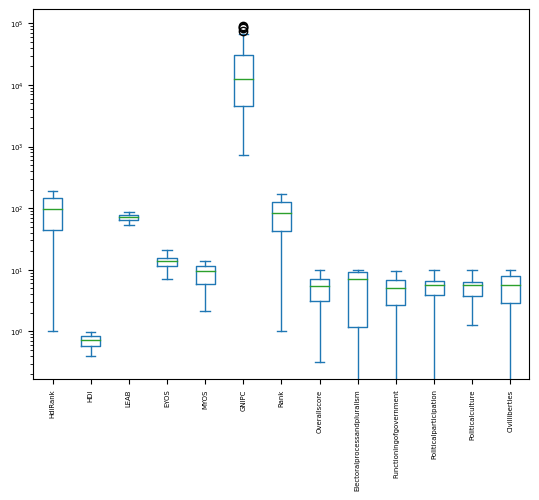

In [446]:
import matplotlib.pyplot as plt

HdiDemo_2.plot(kind='box', rot=90,fontsize=5)
plt.semilogy();

Notice that our concern is the numeric data. In case of categorical it is unusual to worry about it, but some cases might need some thinking.

Let me get the column names of the numeric columns:

In [447]:
import numpy as np

colsToScale = HdiDemo_2.select_dtypes([np.number]).columns

colsToScale

Index(['HdiRank', 'HDI', 'LEAB', 'EYOS', 'MYOS', 'GNIPC', 'Rank',
       'Overallscore', 'Electoralprocessandpluralism',
       'Functioningofgovernment', 'Politicalparticipation', 'Politicalculture',
       'Civilliberties'],
      dtype='object')

Time to produce new ranges (make sure you have previously install **scikit-learn**):

In [448]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_minmax = scaler.fit_transform(HdiDemo_2.loc[:,colsToScale].to_numpy())
df_scaled = pd.DataFrame(df_minmax, columns=colsToScale)

Let's explore the result:

In [449]:

df_scaled.describe().loc[['min','max']].T 


,min,max
HdiRank,0.0,1.0
HDI,0.0,1.0
LEAB,0.0,1.0
EYOS,0.0,1.0
MYOS,0.0,1.0
GNIPC,0.0,1.0
Rank,0.0,1.0
Overallscore,0.0,1.0
Electoralprocessandpluralism,0.0,1.0
Functioningofgovernment,0.0,1.0


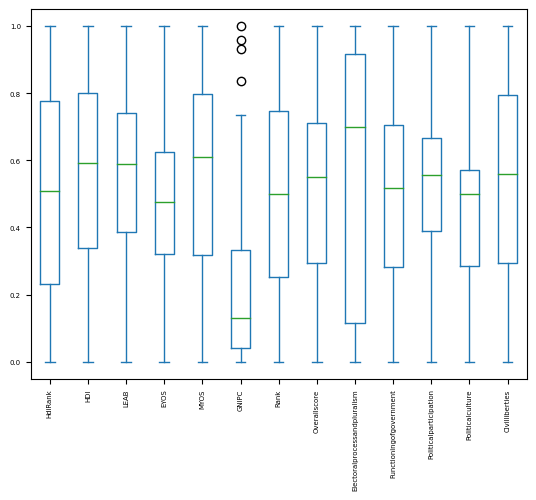

In [450]:
df_scaled.plot(kind='box', rot=90,fontsize=5);

Let's add a suffix to the column names:

In [451]:
df_scaled.columns=df_scaled.columns+"_mM"

In [453]:
# concat to the right (instead of bottom) with axis=1
pd.concat([HdiDemo_2,df_scaled],axis=1)

,HdiRank,Country,HDI,LEAB,EYOS,MYOS,GNIPC,Rank,Regimetype,Overallscore,...,EYOS_mM,MYOS_mM,GNIPC_mM,Rank_mM,Overallscore_mM,Electoralprocessandpluralism_mM,Functioningofgovernment_mM,Politicalparticipation_mM,Politicalculture_mM,Civilliberties_mM
0,1,Switzerland,0.962,83.9872,16.500299,13.859660,66933.004540,7,Full democracy,9.14,...,0.676943,0.980686,0.734045,0.036145,0.929399,0.958,0.963693,0.833,0.929143,0.912
1,2,Norway,0.961,83.2339,18.185200,13.003630,64660.106220,1,Full democracy,9.81,...,0.796461,0.909207,0.708843,0.000000,1.000000,1.000,1.000000,1.000,1.000000,0.941
2,3,Iceland,0.959,82.6782,19.163059,13.767170,55782.049810,3,Full democracy,9.52,...,0.865825,0.972963,0.610402,0.012048,0.969442,1.000,1.000000,0.889,0.929143,0.971
3,4,"Hong Kong, China (SAR)",0.952,85.4734,17.278170,12.226210,62606.845400,88,Hybrid regime,5.28,...,0.732121,0.844292,0.686076,0.524096,0.522655,0.275,0.341286,0.556,0.643429,0.794
4,5,Australia,0.951,84.5265,21.054590,12.726820,49238.433350,15,Full democracy,8.71,...,1.000000,0.886093,0.537846,0.084337,0.884089,1.000,0.889004,0.778,0.714286,0.971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,186,Mali,0.428,58.9414,7.423038,2.310000,2132.629443,119,Authoritarian,3.23,...,0.033050,0.016286,0.015533,0.710843,0.306639,0.117,0.000000,0.556,0.500571,0.382
161,187,Burundi,0.426,61.6627,10.722722,3.129267,731.786709,148,Authoritarian,2.13,...,0.267112,0.084695,0.000000,0.885542,0.190727,0.000,0.000000,0.389,0.428571,0.176
162,188,Central African Republic,0.404,53.8947,8.040172,4.334000,966.058611,164,Authoritarian,1.35,...,0.076826,0.185290,0.002598,0.981928,0.108535,0.083,0.000000,0.167,0.072000,0.235
163,189,Niger,0.400,61.5763,6.957112,2.116717,1239.866936,112,Authoritarian,3.73,...,0.000000,0.000147,0.005634,0.668675,0.359326,0.292,0.155602,0.389,0.500571,0.471


So this is our last version:

In [454]:
hdidem_plus=pd.concat([HdiDemo_2,df_scaled],axis=1)
hdidem_plus.head()

,HdiRank,Country,HDI,LEAB,EYOS,MYOS,GNIPC,Rank,Regimetype,Overallscore,...,EYOS_mM,MYOS_mM,GNIPC_mM,Rank_mM,Overallscore_mM,Electoralprocessandpluralism_mM,Functioningofgovernment_mM,Politicalparticipation_mM,Politicalculture_mM,Civilliberties_mM
0,1,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454,7,Full democracy,9.14,...,0.676943,0.980686,0.734045,0.036145,0.929399,0.958,0.963693,0.833,0.929143,0.912
1,2,Norway,0.961,83.2339,18.185200,13.00363,64660.10622,1,Full democracy,9.81,...,0.796461,0.909207,0.708843,0.000000,1.000000,1.000,1.000000,1.000,1.000000,0.941
2,3,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981,3,Full democracy,9.52,...,0.865825,0.972963,0.610402,0.012048,0.969442,1.000,1.000000,0.889,0.929143,0.971
3,4,"Hong Kong, China (SAR)",0.952,85.4734,17.278170,12.22621,62606.84540,88,Hybrid regime,5.28,...,0.732121,0.844292,0.686076,0.524096,0.522655,0.275,0.341286,0.556,0.643429,0.794
4,5,Australia,0.951,84.5265,21.054590,12.72682,49238.43335,15,Full democracy,8.71,...,1.000000,0.886093,0.537846,0.084337,0.884089,1.000,0.889004,0.778,0.714286,0.971


[Home](#home)
______


<a id='exporting'></a>

### Exporting

#### For future use in Python:

In [455]:
hdidem_plus.to_pickle("hdidem_plus.pkl")
# you will need: DF=pd.read_pickle("hdidem_plus.pkl")
# or:
# from urllib.request import urlopen
# DF=pd.read_pickle(urlopen("https://...../hdidem_plus.pkl"),compression=None)

#### For future  use in R:

In [ ]:
!pip show rpy2

In [456]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects.packages import importr

base = importr('base')
base.saveRDS(hdidem_plus,file="hdidem_plus.RDS")

#In R, you call it with: DF = readRDS("hdidem_plus.RDS")
#or, if read from cloud: DF = readRDS(url("https://...../hdidem_plus.RDS")

<rpy2.rinterface_lib.sexp.NULLType object at 0x162287150> [0]